In [2]:
# !pip install kaggle

In [8]:
import os, shutil, pathlib

original_dir = pathlib.Path("./src_data/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs) # 0 ~ 1 사이값으로 변환
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [11]:
model.compile(loss="binary_crossentropy", # 이진분류
              optimizer="rmsprop", # 학습
              metrics=["accuracy"]) # 평가

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint( # 베스트 모델 저장
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset, # 데이터, 레이블
    epochs=30,
    validation_data=validation_dataset, # 데이터, 레이블
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 12s 84ms/step - loss: 0.8245 - accuracy: 0.5130 - val_loss: 0.6921 - val_accuracy: 0.5040
Epoch 2/30
63/63 [==============================] - 4s 60ms/step - loss: 0.7059 - accuracy: 0.5275 - val_loss: 0.6917 - val_accuracy: 0.6040
Epoch 3/30
63/63 [==============================] - 4s 59ms/step - loss: 0.7158 - accuracy: 0.5680 - val_loss: 0.6893 - val_accuracy: 0.5210
Epoch 4/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6950 - accuracy: 0.5895 - val_loss: 0.6571 - val_accuracy: 0.5790
Epoch 5/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6481 - accuracy: 0.6310 - val_loss: 0.8597 - val_accuracy: 0.5760
Epoch 6/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6203 - accuracy: 0.6830 - val_loss: 0.6221 - val_accuracy: 0.6680
Epoch 7/30
63/63 [==============================] - 4s 58ms/step - loss: 0.5451 - accuracy: 0.7235 - val_loss: 0.6659 - val_accuracy: 0.6580
Epoch 8/30
6

In [14]:
history.history

{'loss': [0.8245332837104797,
  0.7058504223823547,
  0.7158079743385315,
  0.6949897408485413,
  0.6480799913406372,
  0.6202666759490967,
  0.5450539588928223,
  0.5345308184623718,
  0.4801425635814667,
  0.4198499321937561,
  0.3819875121116638,
  0.35079753398895264,
  0.271010160446167,
  0.22472518682479858,
  0.1744423508644104,
  0.14748992025852203,
  0.11226394772529602,
  0.09599177539348602,
  0.0773637592792511,
  0.0763034000992775,
  0.061419304460287094,
  0.0535200759768486,
  0.07008224725723267,
  0.0530644990503788,
  0.05818190425634384,
  0.07944177836179733,
  0.05126772075891495,
  0.03278584033250809,
  0.06366854906082153,
  0.037770118564367294],
 'accuracy': [0.5130000114440918,
  0.5274999737739563,
  0.5680000185966492,
  0.5895000100135803,
  0.6309999823570251,
  0.6830000281333923,
  0.7235000133514404,
  0.7484999895095825,
  0.7745000123977661,
  0.8105000257492065,
  0.824999988079071,
  0.8510000109672546,
  0.8849999904632568,
  0.9085000157356262

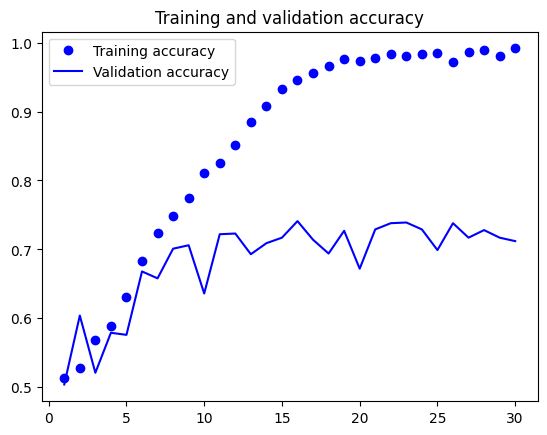

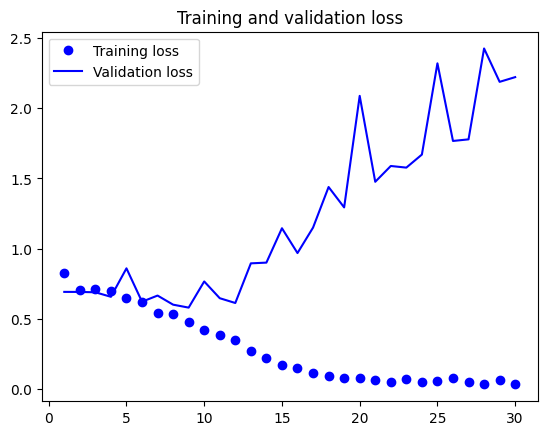

In [15]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 2s 30ms/step - loss: 0.5812 - accuracy: 0.6980
테스트 정확도: 0.698
